*This notebook is part of  course materials for CS 345: Machine Learning Foundations and Practice at Colorado State University.
Original versions were created by Asa Ben-Hur with updates by Ross Beveridge.
The content is availabe [on GitHub](https://github.com/asabenhur/CS345).*

*The text is released under the [CC BY-SA license](https://creativecommons.org/licenses/by-sa/4.0/), and code is released under the [MIT license](https://opensource.org/licenses/MIT).*

<a href="https://colab.research.google.com/github//asabenhur/CS345/blob/master/fall23/notebooks/module01_02_vectors.ipynb">
  <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Linear Algebra Meets Geometry Part 1

In this notebook we go over some concepts in linear algebra and geometry that will allow us to think of data and represention in geometrical terms.

### *Support code*

Imports and useful functions

In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']=150

In [3]:
from matplotlib.ticker import MaxNLocator
def axes_at_zero(ax):
    """helper to make the axes go through (0,0)"""
    ax.spines['left'].set_position(('data', 0.0))
    ax.spines['bottom'].set_position(('data', 0.0))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_aspect('equal')
    


In [4]:
def plot_vector(vector, origin=[0, 0], **options):
    return plt.arrow(origin[0], origin[1], vector[0], vector[1],
              head_width=0.1, head_length=0.2, length_includes_head=True,
              **options)

# Vectors and their Geometry

Vectors are the fundamental building blocks of machine learning data, so we need to understand them well.

In math, a vector is written as a *column* of values:
$$
\mathbf{v} = \begin{pmatrix}1\\7\\0\\1\end{pmatrix}.
$$

It can also be expressed as the transpose of a *row* vector:

$$
\mathbf{v} = \begin{pmatrix}1 & 7 & 0 & 1\end{pmatrix}^\top.
$$ 

The transpose operator exchanges rows and columns, so transforms a row vector into a column vector.

In Python you can represent a vector using a Python list:

In [5]:
v = [1, 7, 0, 1]
v

[1, 7, 0, 1]

NumPy arrays will be a more useful way:

In [6]:
v = np.array([1, 7, 0, 1, 5])
v

array([1, 7, 0, 1, 5])

There is more to a vector than an array of numbers:  a vector can be interpreted as a point in space, or as a direction.

### Vectors as points in space

A vector can be seen as a **point in space**:
its components define a location in space relative to a fixed reference called the *origin*.  
In two or three dimensions, we can visualize this:

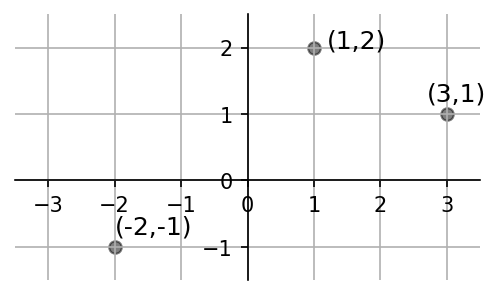

In [7]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
plt.scatter(1,2, c='k', alpha=0.5);
plt.text(1.2,2, '(1,2)', fontsize = 12)
plt.scatter(3,1, c='k', alpha=0.5);
plt.text(2.7,1.2, '(3,1)', fontsize = 12)
plt.scatter(-2,-1, c='k', alpha=0.5);
plt.text(-2,-0.8, '(-2,-1)', fontsize = 12)
plt.ylim(-1.5,2.5);
plt.xlim(-3.5,3.5);
axes_at_zero(ax)
plt.grid()

### An application in computer vision:  Images as points

This geometric point of view allows us to consider the problem of data classification on a more abstract level.
Let's consider for example the problem of classifying images, say distinguishing between cats and dogs.  However, when we interpret the images as simply points in space, 
the problem becomes no different than other classification problems (although images do benefit from classification methods that build on the characteristics of this domain).  On this more abstract level, we seek to discover how to separate two groups of points.

Diving just a bit deeper with the cat and dog example. Here are two vectors representing the face of a dog and a cat. Notice this example motivates in practice what we are so far discussing in an abstract manner. Namely, patterns expressed as points/vectors.

shape of dog vector  (1024,)


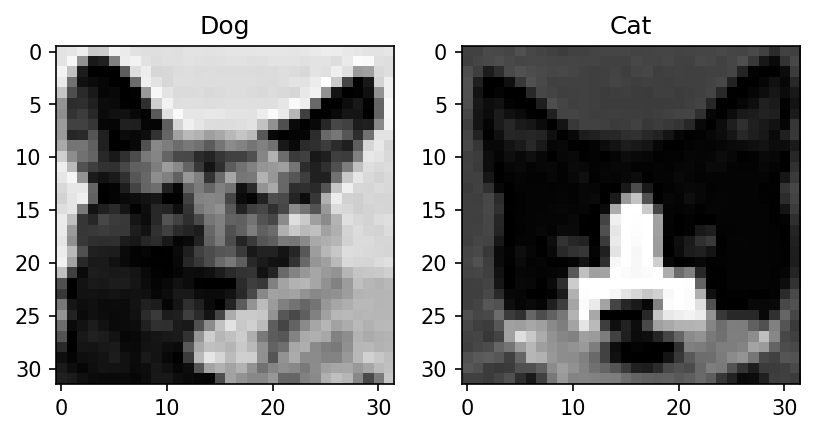

In [8]:
dog_vector = np.array([197, 199, 207, 176, 177, 211, 204, 196, 193, 194, 195, 194, 198, 197, 196, 198, 199, 199, 199, 200, 200, 200, 199, 201, 203, 206, 205, 202, 200, 197, 198, 200, 197, 215, 126, 22, 28, 111, 206, 211, 196, 192, 195, 195, 196, 195, 194, 195, 196, 196, 194, 195, 197, 198, 198, 195, 198, 198, 193, 203, 218, 216, 195, 193, 211, 168, 25, 0, 0, 0, 80, 193, 206, 186, 188, 192, 193, 191, 192, 191, 191, 191, 191, 190, 190, 193, 191, 188, 197, 195, 208, 195, 134, 138, 189, 193, 203, 98, 15, 10, 6, 0, 0, 93, 208, 197, 187, 193, 193, 192, 192, 192, 192, 192, 192, 191, 190, 193, 197, 196, 205, 222, 175, 60, 0, 21, 184, 208, 171, 68, 37, 22, 6, 7, 0, 2, 132, 215, 198, 190, 190, 191, 189, 190, 192, 192, 190, 189, 191, 189, 187, 202, 209, 126, 17, 0, 2, 14, 126, 208, 129, 39, 41, 28, 11, 9, 1, 0, 41, 179, 210, 193, 195, 194, 192, 193, 194, 194, 194, 193, 194, 200, 216, 207, 90, 0, 0, 12, 21, 3, 88, 214, 124, 45, 53, 34, 10, 14, 15, 7, 1, 78, 195, 216, 200, 200, 202, 201, 198, 197, 196, 206, 217, 203, 158, 55, 0, 0, 8, 19, 18, 0, 88, 214, 135, 58, 57, 47, 6, 5, 29, 27, 6, 4, 82, 183, 208, 199, 192, 191, 192, 194, 196, 169, 126, 69, 9, 0, 8, 34, 62, 58, 26, 27, 120, 211, 133, 33, 37, 74, 28, 0, 10, 7, 13, 44, 89, 140, 161, 155, 138, 146, 160, 171, 162, 77, 7, 0, 4, 5, 39, 91, 104, 75, 40, 98, 197, 197, 147, 101, 102, 84, 29, 0, 0, 7, 71, 118, 109, 95, 105, 99, 79, 102, 121, 114, 102, 112, 99, 21, 8, 37, 41, 53, 38, 27, 82, 186, 202, 186, 180, 124, 99, 87, 35, 22, 42, 66, 106, 116, 87, 65, 63, 39, 32, 47, 58, 58, 70, 117, 155, 95, 52, 56, 21, 27, 55, 53, 111, 201, 197, 189, 206, 162, 71, 55, 44, 43, 63, 84, 86, 109, 136, 119, 87, 49, 18, 41, 80, 99, 112, 130, 133, 138, 102, 39, 28, 42, 70, 109, 167, 193, 189, 191, 200, 214, 129, 24, 16, 23, 43, 75, 90, 123, 111, 85, 131, 111, 45, 93, 144, 103, 105, 155, 131, 91, 75, 54, 28, 29, 99, 174, 200, 189, 184, 189, 189, 201, 201, 88, 1, 3, 26, 59, 88, 96, 28, 6, 87, 107, 89, 111, 100, 15, 38, 128, 147, 90, 40, 43, 37, 73, 172, 208, 187, 186, 190, 188, 183, 199, 208, 85, 0, 4, 8, 12, 16, 20, 0, 0, 58, 114, 117, 114, 61, 10, 4, 30, 68, 64, 32, 11, 48, 153, 206, 182, 180, 187, 185, 185, 193, 199, 106, 18, 29, 37, 18, 2, 12, 36, 32, 13, 46, 104, 117, 126, 78, 30, 55, 62, 43, 61, 121, 101, 72, 133, 190, 187, 180, 183, 186, 185, 204, 166, 47, 34, 62, 52, 50, 19, 10, 35, 72, 57, 40, 64, 103, 111, 86, 84, 100, 72, 62, 121, 193, 176, 138, 120, 156, 194, 187, 184, 191, 194, 203, 134, 47, 49, 53, 50, 48, 26, 16, 42, 56, 38, 32, 25, 90, 110, 71, 85, 110, 84, 93, 153, 175, 161, 166, 140, 152, 184, 191, 185, 183, 191, 199, 125, 49, 41, 40, 41, 24, 20, 33, 39, 21, 5, 8, 30, 85, 106, 66, 32, 51, 74, 82, 106, 103, 119, 146, 151, 158, 182, 190, 190, 186, 186, 205, 162, 70, 28, 26, 25, 9, 3, 5, 0, 1, 9, 27, 56, 66, 74, 78, 51, 21, 30, 30, 18, 33, 77, 137, 159, 173, 192, 190, 189, 187, 185, 210, 142, 36, 22, 23, 15, 8, 3, 2, 1, 0, 7, 34, 48, 66, 92, 105, 82, 35, 24, 16, 15, 44, 91, 130, 139, 162, 189, 186, 185, 190, 195, 167, 56, 9, 26, 24, 21, 22, 18, 8, 2, 1, 5, 11, 10, 14, 25, 37, 44, 46, 16, 31, 92, 114, 131, 144, 134, 128, 157, 171, 173, 175, 180, 70, 0, 17, 23, 21, 25, 25, 19, 11, 4, 7, 16, 11, 1, 0, 0, 0, 38, 54, 48, 111, 142, 155, 158, 144, 127, 113, 136, 166, 159, 155, 160, 50, 0, 16, 16, 15, 17, 14, 16, 14, 6, 11, 22, 22, 11, 9, 10, 16, 36, 64, 118, 141, 138, 142, 129, 118, 123, 126, 137, 156, 157, 157, 158, 104, 19, 12, 14, 10, 10, 10, 17, 28, 25, 5, 19, 41, 28, 9, 0, 32, 80, 128, 163, 135, 111, 100, 89, 101, 131, 144, 151, 160, 160, 157, 158, 130, 30, 9, 14, 11, 9, 10, 15, 38, 51, 25, 27, 54, 38, 18, 61, 150, 175, 176, 173, 128, 76, 65, 83, 112, 140, 158, 161, 157, 159, 158, 158, 95, 9, 16, 25, 16, 9, 10, 12, 28, 42, 41, 24, 22, 70, 122, 168, 196, 174, 181, 163, 82, 60, 86, 120, 144, 157, 141, 150, 161, 154, 160, 161, 72, 0, 21, 28, 25, 17, 6, 7, 15, 19, 21, 23, 44, 130, 179, 158, 167, 178, 151, 106, 80, 76, 115, 148, 152, 145, 112, 123, 156, 149, 153, 156, 37, 0, 19, 18, 21, 23, 9, 8, 17, 18, 13, 10, 78, 147, 167, 164, 157, 175, 161, 126, 86, 97, 145, 151, 120, 110, 106, 125, 159, 160, 155, 157, 13, 5, 13, 14, 17, 25, 15, 10, 22, 17, 7, 0, 52, 161, 199, 185, 163, 180, 179, 125, 74, 128, 149, 121, 121, 114, 114, 132, 160, 182, 173, 165, 23, 12, 6, 13, 17, 16, 15, 9, 12, 20, 14, 6, 12, 74, 142, 154, 142, 155, 127, 98, 116, 124, 118, 106, 122, 139, 144, 145, 133, 144, 162, 167, 28, 24, 14, 10, 8, 8, 8, 6, 11, 21, 21, 13, 9, 6, 5, 68, 141, 129, 118, 118, 131, 89, 88, 112, 119, 153, 166, 158, 118, 64, 107, 171])
cat_vector = np.array([65, 66, 74, 72, 69, 80, 71, 67, 64, 61, 65, 65, 68, 69, 69, 70, 67, 68, 69, 69, 67, 68, 69, 69, 72, 69, 68, 73, 65, 43, 65, 64, 63, 69, 74, 78, 72, 69, 71, 71, 69, 68, 69, 68, 68, 66, 66, 65, 71, 68, 68, 70, 65, 66, 72, 70, 66, 70, 78, 56, 23, 9, 51, 72, 77, 62, 28, 46, 73, 81, 76, 73, 70, 72, 69, 65, 63, 64, 67, 62, 68, 70, 62, 64, 66, 64, 64, 65, 66, 69, 37, 3, 0, 0, 12, 61, 81, 31, 0, 0, 15, 56, 81, 72, 64, 65, 66, 65, 63, 64, 68, 65, 62, 64, 63, 62, 64, 64, 64, 67, 71, 34, 0, 1, 6, 17, 6, 40, 80, 19, 0, 4, 0, 0, 40, 70, 67, 63, 64, 65, 63, 60, 62, 63, 60, 59, 63, 63, 61, 62, 64, 68, 40, 1, 0, 6, 13, 22, 11, 24, 78, 24, 13, 17, 3, 0, 0, 30, 77, 68, 63, 65, 63, 60, 61, 61, 61, 61, 61, 61, 61, 63, 67, 38, 0, 0, 6, 14, 33, 26, 2, 19, 70, 21, 11, 27, 16, 10, 2, 0, 33, 67, 68, 65, 62, 62, 63, 62, 62, 61, 62, 65, 67, 68, 49, 6, 0, 12, 25, 28, 34, 31, 0, 27, 63, 20, 5, 27, 39, 26, 22, 11, 0, 20, 56, 66, 65, 63, 59, 60, 66, 56, 60, 56, 52, 39, 8, 0, 12, 30, 47, 31, 25, 18, 6, 54, 68, 34, 0, 15, 38, 36, 38, 35, 15, 0, 8, 28, 32, 39, 39, 46, 49, 41, 34, 20, 6, 1, 2, 7, 12, 22, 39, 30, 23, 9, 33, 55, 71, 54, 8, 8, 19, 26, 40, 25, 6, 8, 1, 0, 3, 12, 19, 29, 25, 21, 7, 1, 0, 3, 5, 4, 6, 9, 11, 15, 18, 12, 12, 26, 64, 61, 13, 5, 14, 8, 15, 7, 0, 7, 9, 2, 3, 0, 5, 12, 9, 7, 2, 3, 3, 6, 5, 6, 12, 7, 1, 2, 9, 7, 0, 38, 66, 58, 13, 0, 7, 9, 4, 7, 8, 3, 10, 8, 3, 5, 7, 7, 3, 3, 4, 3, 6, 7, 4, 10, 9, 4, 3, 3, 7, 3, 0, 48, 64, 64, 22, 0, 3, 5, 3, 3, 7, 3, 8, 15, 2, 6, 5, 8, 12, 1, 4, 4, 9, 6, 3, 4, 4, 4, 4, 4, 4, 1, 21, 58, 61, 65, 49, 7, 0, 4, 4, 4, 3, 4, 3, 7, 6, 1, 0, 25, 76, 25, 0, 3, 6, 8, 7, 2, 4, 4, 4, 4, 1, 2, 53, 70, 64, 62, 71, 43, 0, 2, 4, 4, 4, 5, 3, 7, 9, 0, 27, 153, 196, 82, 0, 7, 4, 14, 7, 4, 5, 4, 4, 4, 2, 1, 44, 67, 64, 64, 72, 48, 1, 2, 4, 4, 6, 7, 5, 6, 1, 10, 171, 255, 255, 202, 69, 4, 3, 5, 2, 5, 5, 4, 4, 4, 4, 1, 20, 60, 64, 63, 70, 38, 0, 3, 4, 5, 5, 5, 8, 1, 0, 67, 239, 255, 254, 255, 161, 4, 0, 2, 0, 0, 4, 4, 4, 4, 4, 1, 3, 47, 64, 65, 70, 36, 0, 2, 4, 7, 3, 10, 9, 0, 0, 79, 230, 255, 253, 255, 160, 3, 0, 3, 24, 30, 3, 3, 4, 4, 4, 3, 0, 36, 63, 69, 67, 23, 0, 4, 4, 0, 13, 50, 38, 34, 1, 59, 234, 255, 251, 255, 157, 1, 14, 26, 49, 58, 1, 4, 5, 4, 4, 3, 1, 32, 69, 73, 56, 10, 3, 14, 6, 1, 9, 41, 50, 55, 4, 33, 228, 255, 247, 255, 156, 0, 12, 28, 32, 20, 2, 4, 4, 4, 4, 3, 2, 29, 71, 81, 62, 11, 2, 10, 3, 5, 0, 1, 5, 19, 0, 46, 247, 255, 248, 255, 206, 8, 0, 3, 8, 2, 3, 4, 4, 4, 4, 3, 2, 28, 68, 70, 63, 17, 0, 6, 5, 3, 5, 7, 88, 192, 160, 164, 255, 251, 248, 251, 255, 173, 107, 128, 39, 1, 1, 4, 4, 4, 4, 2, 5, 36, 63, 64, 67, 22, 0, 8, 7, 1, 10, 47, 204, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 253, 99, 0, 1, 4, 4, 4, 4, 3, 13, 50, 63, 63, 72, 42, 7, 6, 0, 0, 3, 26, 177, 253, 255, 255, 246, 227, 215, 199, 209, 248, 255, 251, 175, 16, 0, 2, 2, 1, 0, 3, 43, 74, 63, 68, 86, 82, 13, 5, 9, 5, 32, 62, 165, 251, 234, 163, 68, 38, 26, 8, 130, 251, 255, 252, 224, 82, 1, 0, 0, 9, 8, 9, 72, 82, 80, 70, 74, 108, 59, 49, 102, 77, 98, 119, 179, 255, 168, 0, 0, 0, 0, 41, 196, 232, 238, 243, 236, 148, 57, 40, 40, 40, 8, 49, 101, 70, 72, 62, 60, 86, 160, 158, 167, 159, 138, 126, 163, 229, 186, 62, 14, 34, 13, 74, 160, 169, 178, 179, 181, 133, 110, 126, 125, 96, 81, 128, 84, 58, 67, 69, 55, 67, 161, 222, 200, 171, 146, 134, 129, 159, 155, 125, 66, 31, 11, 14, 37, 69, 102, 139, 146, 122, 112, 127, 126, 141, 191, 135, 71, 64, 64, 71, 76, 101, 116, 157, 183, 158, 149, 141, 148, 154, 125, 65, 12, 0, 4, 1, 0, 0, 49, 127, 124, 115, 126, 126, 132, 163, 155, 100, 76, 74, 81, 90, 93, 86, 64, 102, 182, 177, 152, 141, 140, 128, 105, 65, 16, 1, 0, 0, 0, 20, 56, 89, 109, 110, 123, 139, 148, 118, 72, 66, 85, 83, 87, 80, 61, 56, 59, 80, 81, 96, 139, 158, 145, 132, 113, 101, 84, 58, 32, 29, 43, 74, 80, 75, 104, 126, 121, 83, 53, 29, 58, 60, 63, 74, 64, 64, 59, 68, 80, 46, 25, 65, 120, 153, 131, 133, 130, 126, 125, 110, 100, 96, 94, 96, 88, 94, 106, 93, 55, 34, 10, 12, 33, 62, 64, 59])
dog_vector = dog_vector / 255.0
cat_vector = cat_vector / 255.0
print("shape of dog vector ", dog_vector.shape)
# convert the vectors into 32 x 32 images:
dog_32x32 = dog_vector.reshape((32,32))
cat_32x32 = cat_vector.reshape((32,32))
# Now build the plot figure with the dog and cat image
fig     = plt.figure()
ax1     = fig.add_subplot(1, 2, 1)
dogplot = plt.imshow(dog_32x32, cmap="gray")
ax2     = fig.add_subplot(1, 2, 2)
catplot = plt.imshow(cat_32x32, cmap="gray")
ax1.set_title('Dog')
ax2.set_title('Cat');

### Vectors as directions

There is a second point of view of vectors: as **directions** in space. 
In this way, we consider all the vectors in the figure below as being the same.

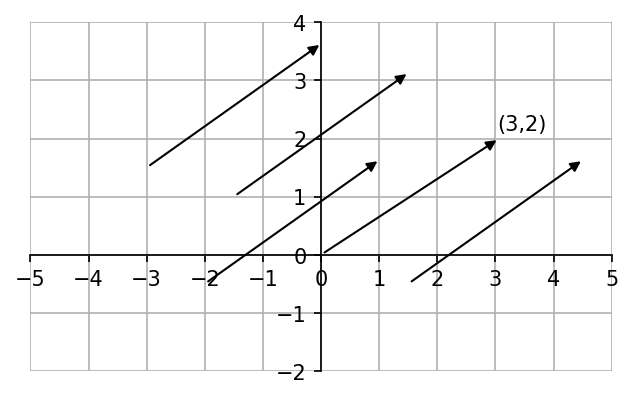

In [9]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
plt.annotate("(3,2)", xy =(0,0), xytext=(3.03,2.15), arrowprops=dict(facecolor='black', arrowstyle='<|-'));
plt.annotate("", xy =(1.5,-0.5), xytext=(4.53,1.65), arrowprops=dict(facecolor='black', arrowstyle='<|-'));
plt.annotate("", xy =(-2,-0.5), xytext=(1.03,1.65), arrowprops=dict(facecolor='black', arrowstyle='<|-'));
plt.annotate("", xy =(-1.5,1), xytext=(1.53,3.15), arrowprops=dict(facecolor='black', arrowstyle='<|-'));
plt.annotate("", xy =(-3,1.5), xytext=(0.03,3.65), arrowprops=dict(facecolor='black', arrowstyle='<|-'));

plt.ylim(-2,4);
plt.xlim(-5,5);
axes_at_zero(ax)
plt.grid()

### Vectors as points and directions

To reconcile the two view of the concept of a vector, we note that for any point in space there is a corresponding vector starting at the *origin* and ending that point. 

Visually:

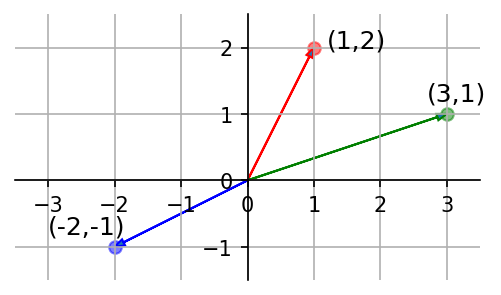

In [10]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
plt.scatter(1,2, c='r', alpha=0.5)
plt.arrow(0,0, 1,2, head_width=0.1, ec='r', length_includes_head=True)
plt.text(1.2,2, '(1,2)', fontsize = 12)
plt.scatter(3,1, c='g', alpha=0.5)
plt.arrow(0,0, 3,1, head_width=0.1, ec='g', length_includes_head=True)
plt.text(2.7,1.2, '(3,1)', fontsize = 12)
plt.scatter(-2,-1, c='b', alpha=0.5)
plt.arrow(0,0, -2,-1, head_width=0.1, ec='b', length_includes_head=True)
plt.text(-3,-0.8, '(-2,-1)', fontsize = 12)
plt.ylim(-1.5,2.5);
plt.xlim(-3.5,3.5);
axes_at_zero(ax)
plt.grid()

## Operations on vectors

### Vector addition

Vectors of same size can be added together. Addition is performed *elementwise*:


In [11]:
u = np.array([2, 5])
v = np.array([3, 1])

print(" ", u)
print("+", v)
print("-"*10)
u + v

  [2 5]
+ [3 1]
----------


array([5, 6])

Keep in mind that the `+` operator for Python lists does something else altogether!

The geometric view of vectors helps us make visual sense of vector addition: we follow the direction given by one vector, and then follow the direction given by the other:

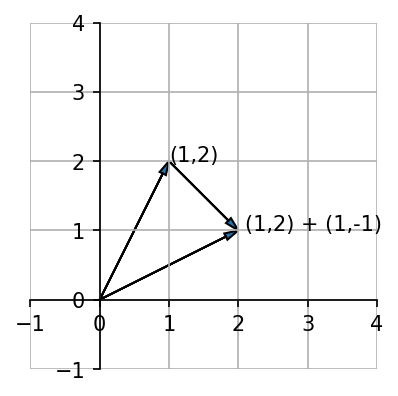

In [12]:
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(111)

u = np.array([1, 2])
v = np.array([1, -1])

plot_vector(u)
plot_vector(v, origin=u)
plot_vector(u+v)

plt.text(1,2, "(1,2)");
plt.text(2.1,1, "(1,2) + (1,-1)")

plt.ylim(-1,4);
plt.xlim(-1,4);
plt.grid()
axes_at_zero(ax)


This geometric perspective also demonstrates that vector addition is commutative, i.e. the order in which you add vectors does not matter:

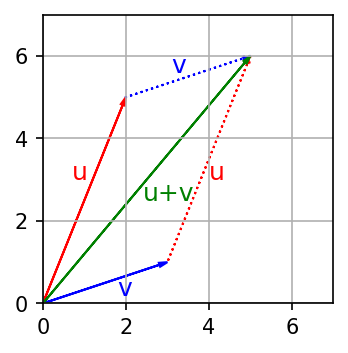

In [13]:
u = np.array([2, 5])
v = np.array([3, 1])

plt.figure(figsize=(2.5,2.5))

plot_vector(u, color="r")
plot_vector(v, color="b")
plot_vector(v, origin=u, color="b", linestyle="dotted")
plot_vector(u, origin=v, color="r", linestyle="dotted")
plot_vector(u+v, color="g")

plt.axis([0, 7, 0, 7])
plt.text(0.7, 3, "u", color="r", fontsize=12)
plt.text(4, 3, "u", color="r", fontsize=12)
plt.text(1.8, 0.2, "v", color="b", fontsize=12)
plt.text(3.1, 5.6, "v", color="b", fontsize=12)
plt.text(2.4, 2.5, "u+v", color="g", fontsize=12)
plt.grid()

### Question

* Given a vector $\mathbf{v}$, what is the direction of $-\mathbf{v}$?

### Vector Subtraction

Vector subtraction also has geometrical interpretation.
By considering the identity that 

$$\mathbf{u} = \mathbf{v} + (\mathbf{u}-\mathbf{v}),$$

we see that the vector $\mathbf{u}-\mathbf{v}$ is the direction 
that takes us from the point $\mathbf{v}$ to the point $\mathbf{u}$.

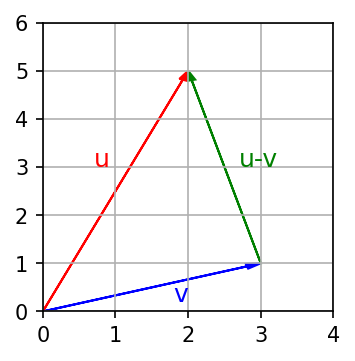

In [14]:
u = np.array([2, 5])
v = np.array([3, 1])

plt.figure(figsize=(2.5,2.5))

plot_vector(u, color="r")
plot_vector(v, color="b")
plot_vector(u-v, origin=v, color="g")

plt.axis([0, 4, 0, 6])
plt.text(0.7, 3, "u", color="r", fontsize=12)
#plt.text(4, 3, "u", color="r", fontsize=12)
plt.text(1.8, 0.2, "v", color="b", fontsize=12)
#plt.text(3.1, 5.6, "v", color="b", fontsize=12)
plt.text(2.7, 3, "u-v", color="g", fontsize=12)
plt.grid()

### Multiplication by a scalar

A vector can be multiplied by a scalar (i.e. number).  The result is a vector where all elements of the vector are multiplied by that number.
Here's an example of that in NumPy:

In [15]:
u = np.array([2, 5])

number = 1.5
print(number, " * ", u, "=")

print(number * u)

1.5  *  [2 5] =
[3.  7.5]


Let's get an intuition of what scalar multiplication does:

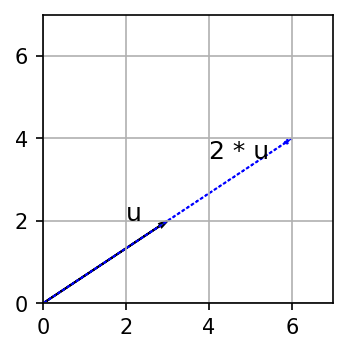

In [16]:
u = np.array([3, 2])
a = 2

plt.figure(figsize=(2.5,2.5))

plot_vector(u)
plot_vector(a * u, color="b", linestyle="dotted")
plt.text(2, 2, "u", color="k", fontsize=12)
plt.text(4, 3.5, str(a)+ " * u", color="k", fontsize=12)
plt.axis([0, 7, 0, 7])
plt.grid()

* Looking at this figure, what can you say about the relationship between the direction defined by the vector $\mathbf{u}$ compared $a \cdot \mathbf{u}$, where $a$ is a real number?